# Image Generation from ITdiffusion fine-tuning on CIFAR10 IDDPM

We had previously sampled from the model and saved the results in .npz files. In this notebook, we read these files and display the images

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Setup and loading saved image arrays

In [13]:
import os

In [180]:
dir_gen_images = "drive/MyDrive/density_estimation/generated_images/generated_images_cifar10/"
!ls $dir_gen_images

fine_tuned  original


In [181]:
dir_gen_images_fine_tuned = os.path.join(dir_gen_images, "fine_tuned/")
!ls $dir_gen_images_fine_tuned

samples_4x32x32x3.npz


In [14]:
path_gen_images_fine_tuned = os.path.join(dir_gen_images_fine_tuned, "samples_4x32x32x3.npz")
!stat $path_gen_images_fine_tuned

  File: drive/MyDrive/density_estimation/generated_images/generated_images_cifar10/fine_tuned/samples_4x32x32x3.npz
  Size: 12552     	Blocks: 25         IO Block: 65536  regular file
Device: 2bh/43d	Inode: 516         Links: 1
Access: (0600/-rw-------)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2023-04-27 08:08:27.000000000 +0000
Modify: 2023-04-27 08:06:57.000000000 +0000
Change: 2023-04-27 08:08:27.000000000 +0000
 Birth: -


In [182]:
dir_gen_images_original = os.path.join(dir_gen_images, "original/")
!ls $dir_gen_images_original

samples_4x32x32x3.npz


In [183]:
path_gen_images_original = os.path.join(dir_gen_images_original, "samples_4x32x32x3.npz")
!stat $path_gen_images_original

  File: drive/MyDrive/density_estimation/generated_images/generated_images_cifar10/original/samples_4x32x32x3.npz
  Size: 12552     	Blocks: 25         IO Block: 65536  regular file
Device: 2bh/43d	Inode: 579         Links: 1
Access: (0600/-rw-------)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2023-04-27 08:08:27.000000000 +0000
Modify: 2023-04-27 08:06:57.000000000 +0000
Change: 2023-04-27 08:08:27.000000000 +0000
 Birth: -


In [185]:
import PIL.Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


def display_sample(sample, idx=0, custom_figsize=None):
    image_processed = (sample).astype(np.uint8)
    image_pil = PIL.Image.fromarray(image_processed[idx])

    if custom_figsize:
        plt.figure(figsize=custom_figsize)
        plt.imshow(image_pil)

    else:
        display(image_pil)    

## Section 1: Images generated after using ITdiffusion to fine-tune pre-trained CIFAR10 IDDPM (from OpenAI)

In [186]:
sample_fine_tuned = np.load(path_gen_images_fine_tuned)["arr_0"]
# sample = sample[1:2,]
sample_fine_tuned.shape

(4, 32, 32, 3)

In [187]:
# sample_fine_tuned[0]

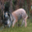

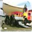

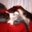

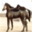

In [188]:
# sample_processed = ((sample + 1.0) * 127.5).astype(np.uint8)
# im = PIL.Image.fromarray(sample_processed[0])
# display(im)

for idx in range(0, sample_fine_tuned.shape[0]):
    display_sample(sample_fine_tuned, idx=idx)
# sample_processed = (np.squeeze(sample) * 255).astype(np.uint8)
# im = PIL.Image.fromarray(sample_processed)
# display(im)

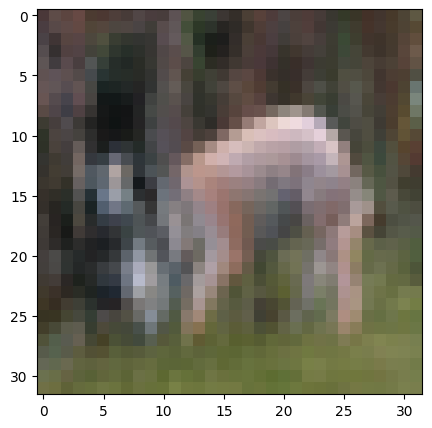

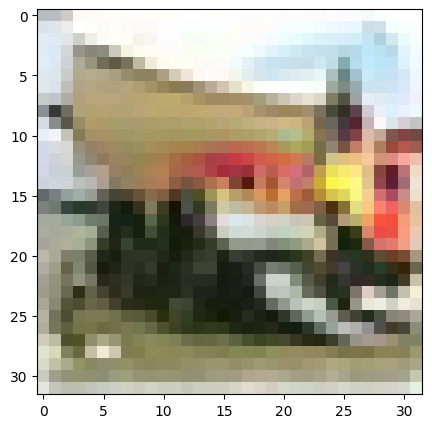

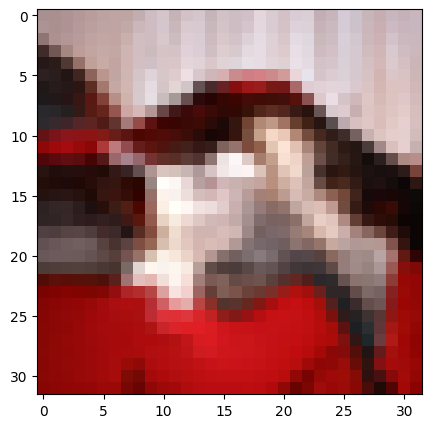

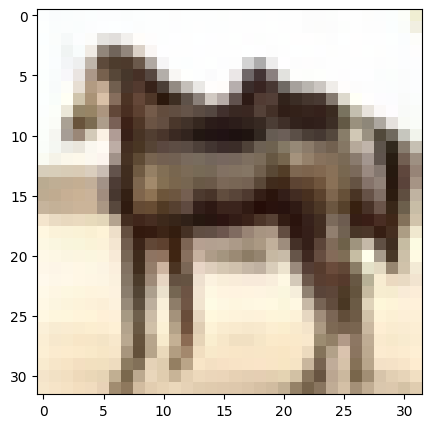

In [189]:
for idx in range(0, sample_fine_tuned.shape[0]):
    display_sample(sample_fine_tuned, idx=idx, custom_figsize=(5,5))

## Section 2: Images generated from original pre-trained CIFAR10 IDDPM (from OpenAI)

In [192]:
sample_original = np.load(path_gen_images_original)["arr_0"]
sample_original.shape

(4, 32, 32, 3)

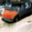

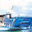

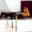

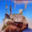

In [193]:
for idx in range(0, sample_original.shape[0]):
    display_sample(sample_original, idx=idx)

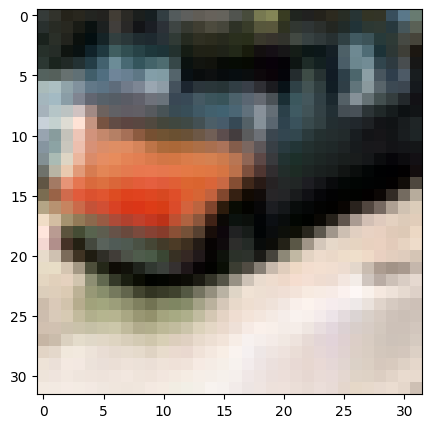

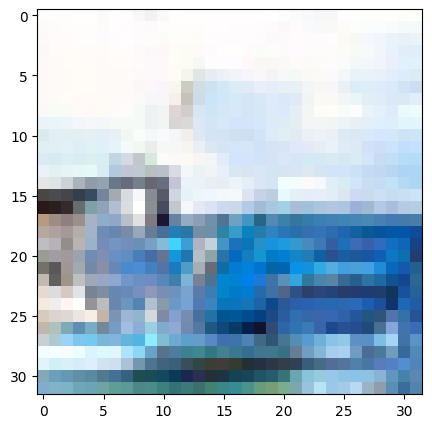

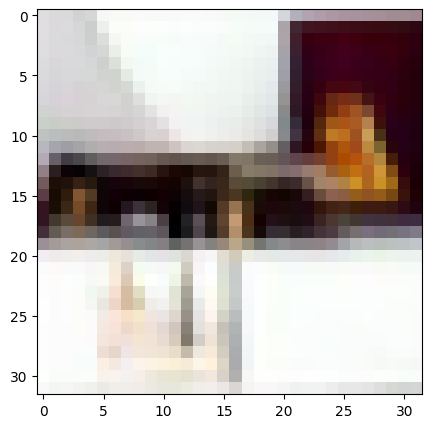

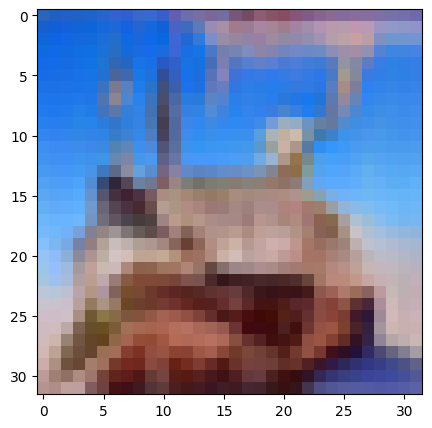

In [194]:
for idx in range(0, sample_original.shape[0]):
    display_sample(sample_original, idx=idx, custom_figsize=(5,5))